In [27]:
# If not installed, run this cell. It is needed for the determination of the recession constant
#!pip install hydrosignatures
#!pip show hydrosignatures

In [28]:
#!pip install pygeohydro
#!pip show pygeohydro

In [29]:
# The following two lines had to be executed to correct the modifications on library dependencies that the above libraries carried out when installing
#!pip install -U --force-reinstall scipy
#!pip install matplotlib --upgrade
#!pip install aiohttp --upgrade

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

import hydrosignatures as hs
from pygeohydro import NWIS

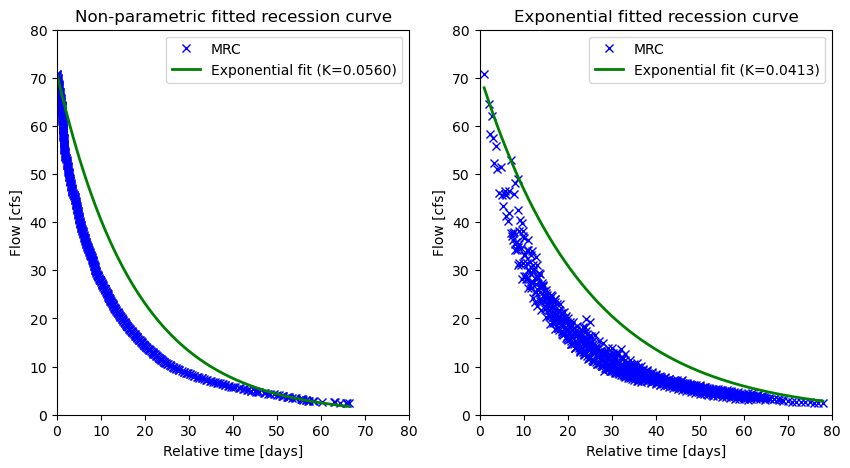

In [31]:
''' Example of how to use the baseflow recession function from the hydrosignatures library '''

# Get streamflow data
nwis = NWIS()
q = nwis.get_streamflow("12304500", ("2000-01-01", "2019-12-31"))
mrc_np, bfr_k_np = hs.baseflow_recession(q, fit_method="nonparametric_analytic")
mrc_exp, bfr_k_exp = hs.baseflow_recession(q, fit_method="exponential")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

ax1.plot(mrc_np[:, 0], mrc_np[:, 1], "bx")
ax1.plot(
    np.sort(mrc_np[:, 0]),
    np.exp(np.log(mrc_np[0, 1]) - bfr_k_np * np.sort(mrc_np[:, 0])),
    "g-",
    linewidth=2,
)
ax1.set_xlabel("Relative time [days]")
ax1.set_ylabel("Flow [cfs]")
ax1.set_xlim(0, 80)
ax1.set_ylim(0, 80)
ax1.set_title("Non-parametric fitted recession curve")
ax1.legend(["MRC", f"Exponential fit (K={bfr_k_np:.4f})"])

ax2.plot(mrc_exp[:, 0], mrc_exp[:, 1], "bx")
ax2.plot(
    np.sort(mrc_exp[:, 0]),
    np.exp(np.log(mrc_exp[0, 1]) - bfr_k_exp * np.sort(mrc_exp[:, 0])),
    "g-",
    linewidth=2,
)
ax2.set_xlabel("Relative time [days]")
ax2.set_ylabel("Flow [cfs]")
ax2.set_xlim(0, 80)
ax2.set_ylim(0, 80)
ax2.set_title("Exponential fitted recession curve")
ax2.legend(["MRC", f"Exponential fit (K={bfr_k_exp:.4f})"])

In [32]:
''' Comparion of the alpha value obtained from the example (without weights) with the alpha value obtained by using the 'polyfit' function from numpy (with weights) '''

x = list(mrc_np[:, 0])
y = list(mrc_np[:, 1])

# Fit a linear regression model
coefficients = np.polyfit(x, np.log(y), 1, w=np.sqrt(y)) # Use of weights (w) to avoid bias towards small values
beta = np.exp(coefficients[1])
alpha = coefficients[0]
print("The alpha value differs from the example ('bfr_k_np') when a weight is assigned in the 'polyfit' function:", round(alpha, 4))

# Fit a linear regression model
coefficients2 = np.polyfit(x, np.log(y), 1) # Default use - without weights
beta2 = np.exp(coefficients2[1])
alpha2 = coefficients2[0]
print("The alpha value is the same value that that from the example ('bfr_k_np') when a weight is not assigned in the 'polyfit' function:", round(alpha2, 4))

The alpha value differs from the example ('bfr_k_np') when a weight is assigned in the 'polyfit' function: -0.0669
The alpha value is the same value that that from the example ('bfr_k_np') when a weight is not assigned in the 'polyfit' function: -0.056


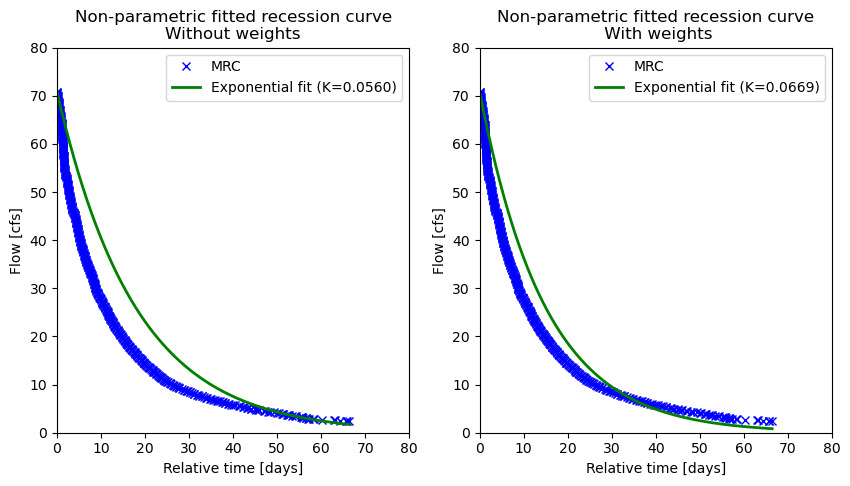

In [33]:
''' Plot of the non-parametric fitted recession curve with and without weights '''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

ax1.plot(mrc_np[:, 0], mrc_np[:, 1], "bx")
ax1.plot(
    np.sort(mrc_np[:, 0]),
    np.exp(np.log(mrc_np[0, 1]) - abs(alpha2) * np.sort(mrc_np[:, 0])),
    "g-",
    linewidth=2,
)
ax1.set_xlabel("Relative time [days]")
ax1.set_ylabel("Flow [cfs]")
ax1.set_xlim(0, 80)
ax1.set_ylim(0, 80)
ax1.set_title("Non-parametric fitted recession curve\nWithout weights")
ax1.legend(["MRC", f"Exponential fit (K={abs(alpha2):.4f})"])

ax2.plot(mrc_np[:, 0], mrc_np[:, 1], "bx")
ax2.plot(
    np.sort(mrc_np[:, 0]),
    np.exp(np.log(mrc_np[0, 1]) - abs(alpha) * np.sort(mrc_np[:, 0])),
    "g-",
    linewidth=2,
)
ax2.set_xlabel("Relative time [days]")
ax2.set_ylabel("Flow [cfs]")
ax2.set_xlim(0, 80)
ax2.set_ylim(0, 80)
ax2.set_title("Non-parametric fitted recession curve\n With weights")
ax2.legend(["MRC", f"Exponential fit (K={abs(alpha):.4f})"])

**Coeficiente de determinación ($R^2$)**  
   - Se obtiene elevando al cuadrado el coeficiente de correlación ($R^2$), lo que significa que **no distingue entre correlaciones positivas y negativas**.  
   - Representa el **porcentaje de variabilidad** de una variable que es explicada por la otra en un modelo de regresión.  
   - Si quieres evaluar **qué tan bien un modelo explica la variabilidad de los datos**, este es el mejor indicador.

In [34]:
''' Coefficient of determination of the non-parametric fitted recession curve with and without weights '''

corr_matrix = np.corrcoef(mrc_np[:, 1], np.exp(np.log(mrc_np[0, 1]) - abs(alpha2) * np.sort(mrc_np[:, 0])))
corr = corr_matrix[0,1]
R_sq = corr**2
print("Coeffcient of determination with alpha value", abs(round(alpha2, 4)), "--without weights-- is", round(R_sq, 3))

corr_matrix2 = np.corrcoef(mrc_np[:, 1], np.exp(np.log(mrc_np[0, 1]) - abs(alpha) * np.sort(mrc_np[:, 0])))
corr2 = corr_matrix2[0,1]
R_sq2 = corr2**2
print("Coeffcient of determination with alpha value", abs(round(alpha, 4)), "--with weights-- is", round(R_sq2, 3))

Coeffcient of determination with alpha value 0.056 --without weights-- is 0.955
Coeffcient of determination with alpha value 0.0669 --with weights-- is 0.972


In [35]:
# Whole-period monthly dataset
css_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs\Streamflow_Stations\Climate_Sensitive_Stations-GRDC"
monthly_folder = css_folder + "\\2025-02-13_17-18_Monthly"

In [36]:
# Read the DF with all the monthly data
df_cleaned = pd.read_csv(monthly_folder + "\_DataFrames\Joined_Monthly_Sts_DFs.csv", index_col="YYYY-MM")
df_cleaned.index = pd.to_datetime(df_cleaned.index, format='%Y-%m')
df_cleaned

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.384,67.277,NaN,NaN,NaN,1.935,NaN,NaN,NaN
1958-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,359.689,458.993,NaN,NaN,NaN,1.771,NaN,NaN,NaN
1958-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,353.968,283.710,NaN,NaN,NaN,1.813,NaN,NaN,NaN
1958-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,567.067,422.700,NaN,NaN,NaN,1.650,NaN,NaN,NaN
1958-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,510.806,298.016,NaN,NaN,NaN,5.655,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.768,11.174,17.029,3.885,2.418,1.490,19.073
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.716,16.677,13.024,7.144,1.497,1.316,40.910
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.202,9.018,32.953,6.251,3.855,6.647,38.705


**"hs.baseflow_recession()"**: Calculate baseflow recession constant and master recession curve.

*Notes*\
This function is ported from the TOSSH Matlab toolbox, which is based on the following publication:

- Gnann, S.J., Coxon, G., Woods, R.A., Howden, N.J.K., McMillan H.K., 2021. TOSSH: A Toolbox for Streamflow Signatures in Hydrology. Environmental Modelling & Software. https://doi.org/10.1016/j.envsoft.2021.104983

This function calculates baseflow recession constant assuming exponential recession behaviour (Safeeq et al., 2013). Master recession curve (MRC) is constructed using the adapted matching strip method (Posavec et al., 2006).

According to Safeeq et al. (2013), K < 0.065 represent groundwater dominated slow-draining systems, K >= 0.065 represent shallow subsurface flow dominated fast draining systems.

*Parameters*
- streamflow : numpy.ndarray\
    Streamflow as a 1D array.

- freq : float, optional\
    Frequency of steamflow in number of days. Default is 1, i.e., daily streamflow.

- recession_length : int, optional\
    Minimum length of recessions [days]. Default is 15.

- n_start : int, optional\
    Days to be removed after start of recession. Default is 0.

- eps : float, optional\
    Allowed increase in flow during recession period. Default is 0.

- start_of_recession : {'baseflow', 'peak'}, optional\
    Define start of recession. Default is 'baseflow'.

- fit_method : {'nonparametric_analytic', 'exponential'}, optional\
    Method to fit mrc. Default is 'nonparametric_analytic'.

- lyne_hollick_smoothing : float, optional\
    Smoothing parameter of Lyne-Hollick filter. Default is 0.925.

*Returns*
- mrc : numpy.ndarray\
    Master Recession Curve as 2D array of [time, flow].

* bf_recession_k : float\
    Baseflow Recession Constant [1/day].

*Raises*
- ValueError\
    If no recession segments are found or if a complex BaseflowRecessionK is calculated.

In [37]:
''' Determination of alpha factor with all the monthly data series '''

# Initialize an empty list to store the results
results = []

for station in df_cleaned.columns:
    print("Processing station:", station)
    
    try:
        # Attempt to calculate alpha without weights
        # Note1: The freq parameter is set to 30.4375 to represent a monthly frequency (365.25 days / 12 months)
        # Note2: The recession_length parameter seems to not have an effect on the results, so it is left as deafult (15)
        mrc_np, alpha_without_weights = hs.baseflow_recession(df_cleaned[station], fit_method="nonparametric_analytic", freq=30.4375)  # Monthly frequency
        
        # Extract x and y values
        x = list(mrc_np[:, 0])
        y = list(mrc_np[:, 1])
        intercept = mrc_np[0, 1] # It is the first value of the MRC, which is the flow at time 0, also known as the baseflow at time 0 (Q0)

        # Calculate alpha with weights
        coefficients = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
        alpha_with_weights = abs(coefficients[0])

        # Compute R^2 without weights
        corr_matrix_without_weights = np.corrcoef(y, np.exp(np.log(intercept) - alpha_without_weights * np.sort(x)))
        corr_without_weights = corr_matrix_without_weights[0, 1]
        R_sq_without_weights = corr_without_weights ** 2

        # Compute R^2 with weights
        corr_matrix_with_weights = np.corrcoef(y, np.exp(np.log(intercept) - alpha_with_weights * np.sort(x)))
        corr_with_weights = corr_matrix_with_weights[0, 1]
        R_sq_with_weights = corr_with_weights ** 2
    
    except Exception as e:
        print(f"Error processing station {station}: {e}")
        
        # Assign NaN values if an error occurs
        alpha_without_weights = np.nan
        R_sq_without_weights = np.nan
        alpha_with_weights = np.nan
        R_sq_with_weights = np.nan

    # Store results in a dictionary
    results.append({
        "station": station,
        "alpha_without_weights": alpha_without_weights,
        "R_sq_without_weights": R_sq_without_weights,
        "alpha_with_weights": alpha_with_weights,
        "R_sq_with_weights": R_sq_with_weights
    })

# Convert list of dictionaries into a DataFrame
df_results = pd.DataFrame(results)
df_results

Processing station: 3617110
Processing station: 3617811
Processing station: 3617812
Processing station: 3617814
Processing station: 3618051
Processing station: 3618052
Processing station: 3618500
Processing station: 3618700
Processing station: 3618711
Processing station: 3618720
Processing station: 3618721
Processing station: 3618722
Processing station: 3618950
Processing station: 3618951
Processing station: 3621200
Processing station: 3623100
Processing station: 3625000
Processing station: 3626000
Processing station: 3627000
Processing station: 3628400
Processing station: 3628701
Processing station: 3628900
Processing station: 3629001
Processing station: 3630600
Processing station: 3631100
Processing station: 3632400
Processing station: 3633120
Processing station: 3633123
Processing station: 3633160
Processing station: 3633180
Processing station: 3633301
Processing station: 3634150
Processing station: 3634160
Processing station: 3634320
Processing station: 3634340
Processing station: 

,station,alpha_without_weights,R_sq_without_weights,alpha_with_weights,R_sq_with_weights
0,3617110,0.013056,0.980595,0.306235,0.942563
1,3617811,0.014590,0.966449,0.310441,0.851703
2,3617812,0.008734,0.990654,0.236255,0.962861
3,3617814,0.005583,0.937448,0.173560,0.986841
4,3618051,0.006578,0.973592,0.191049,0.989659
...,...,...,...,...,...
805,6854601,0.024049,0.679500,0.908978,0.964636
806,6854713,0.016783,0.777411,0.559006,0.981133
807,6855411,0.021992,0.780177,0.729128,0.971782
808,6855412,0.022134,0.919623,0.572183,0.992569


In [38]:
df_results.describe()

,alpha_without_weights,R_sq_without_weights,alpha_with_weights,R_sq_with_weights
count,808.000000,808.000000,808.000000,808.000000
mean,0.021656,0.819904,0.572503,0.974228
std,0.014762,0.101579,0.268953,0.032143
min,0.001369,0.453238,0.042349,0.605991
25%,0.014079,0.762261,0.404867,0.969442
50%,0.018272,0.831166,0.520930,0.984318
75%,0.023829,0.896657,0.691109,0.991783
max,0.118282,0.990654,3.236264,0.999387


**CONCLUSION:** Based on the analysis, it is better to use the alpha values obtained using weights for the resulting 808 stations (only 2 stations were discarded in the process). One key point is that by considering these results, selected alpha values are those that were determined from model fits with $R^2$ greater than 0.6. 

In [39]:
# Select the station with the highest R_sq_with_weights
highest_rsq_station = df_results.loc[df_results["R_sq_with_weights"].idxmax()]

# Select the station with the lowest R_sq_with_weights
lowest_rsq_station = df_results.loc[df_results["R_sq_with_weights"].idxmin()]

highest_rsq_station, lowest_rsq_station

(station                   4121102
 alpha_without_weights    0.063223
 R_sq_without_weights     0.657006
 alpha_with_weights        0.99931
 R_sq_with_weights        0.999387
 Name: 226, dtype: object,
 station                   6139850
 alpha_without_weights    0.046928
 R_sq_without_weights     0.872341
 alpha_with_weights       0.593078
 R_sq_with_weights        0.605991
 Name: 752, dtype: object)

In [40]:
# Select the station with the highest "R_sq_with_weights" and calculate the non-parametric recession curve
mrc_np_high = hs.baseflow_recession(df_cleaned[highest_rsq_station["station"]], fit_method="nonparametric_analytic", freq=30.4375)[0]  # Monthly frequency

# Select the station with the lowest "R_sq_with_weights" and calculate the non-parametric recession curve
mrc_np_low = hs.baseflow_recession(df_cleaned[lowest_rsq_station["station"]], fit_method="nonparametric_analytic", freq=30.4375)[0]  # Monthly frequency

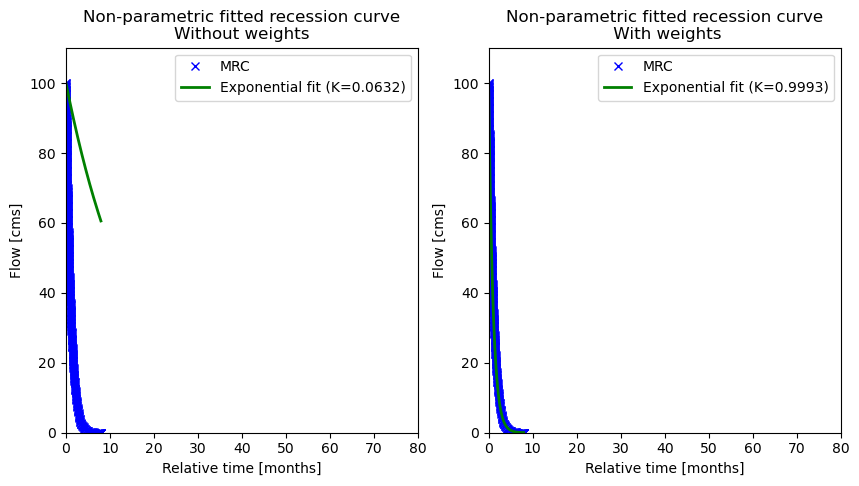

In [41]:
''' Plot of the non-parametric fitted recession curve with and without weights for the station with the highest "R_sq_with_weights" '''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

alpha_without_weights = highest_rsq_station["alpha_without_weights"]
alpha_with_weights = highest_rsq_station["alpha_with_weights"]

# Extract x and y values
x = list(mrc_np_high[:, 0])
y = list(mrc_np_high[:, 1])
intercept = mrc_np_high[0, 1] # It is the first value of the MRC, which is the flow at time 0, also known as the baseflow at time 0 (Q0)

ax1.plot(x, y, "bx")
ax1.plot(
    np.sort(x),
    np.exp(np.log(intercept) - abs(alpha_without_weights) * np.sort(x)),
    "g-",
    linewidth=2,
)
ax1.set_xlabel("Relative time [months]")
ax1.set_ylabel("Flow [cms]")
ax1.set_xlim(0, 80)
ax1.set_ylim(0, intercept + 10) # Adjusted to fit the data
ax1.set_title("Non-parametric fitted recession curve\nWithout weights")
ax1.legend(["MRC", f"Exponential fit (K={abs(alpha_without_weights):.4f})"])

ax2.plot(x, y, "bx")
ax2.plot(
    np.sort(x),
    np.exp(np.log(intercept) - abs(alpha_with_weights) * np.sort(x)),
    "g-",
    linewidth=2,
)
ax2.set_xlabel("Relative time [months]")
ax2.set_ylabel("Flow [cms]")
ax2.set_xlim(0, 80)
ax2.set_ylim(0, intercept + 10) # Adjusted to fit the data
ax2.set_title("Non-parametric fitted recession curve\n With weights")
ax2.legend(["MRC", f"Exponential fit (K={abs(alpha_with_weights):.4f})"])

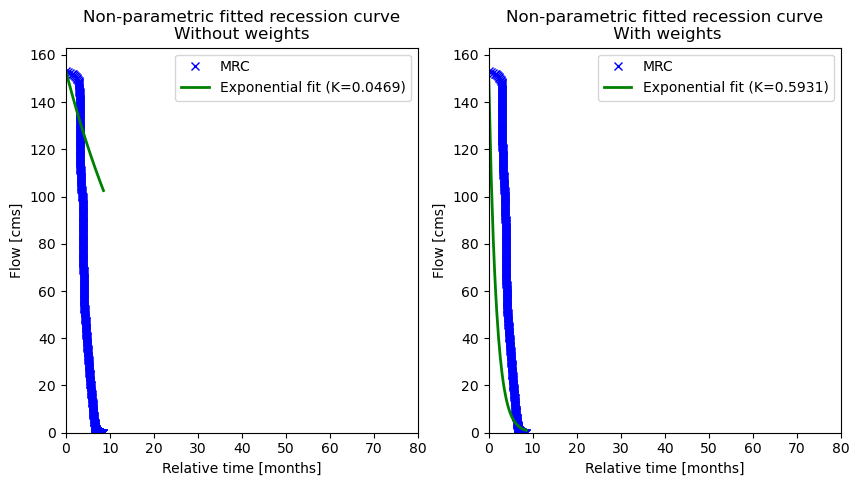

In [42]:
''' Plot of the non-parametric fitted recession curve with and without weights for the station with the lowest "R_sq_with_weights" '''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

alpha_without_weights = lowest_rsq_station["alpha_without_weights"]
alpha_with_weights = lowest_rsq_station["alpha_with_weights"]

# Extract x and y values
x = list(mrc_np_low[:, 0])
y = list(mrc_np_low[:, 1])
intercept = mrc_np_low[0, 1] # It is the first value of the MRC, which is the flow at time 0, also known as the baseflow at time 0 (Q0)

ax1.plot(x, y, "bx")
ax1.plot(
    np.sort(x),
    np.exp(np.log(intercept) - abs(alpha_without_weights) * np.sort(x)),
    "g-",
    linewidth=2,
)
ax1.set_xlabel("Relative time [months]")
ax1.set_ylabel("Flow [cms]")
ax1.set_xlim(0, 80)
ax1.set_ylim(0, intercept + 10) # Adjusted to fit the data
ax1.set_title("Non-parametric fitted recession curve\nWithout weights")
ax1.legend(["MRC", f"Exponential fit (K={abs(alpha_without_weights):.4f})"])

ax2.plot(x, y, "bx")
ax2.plot(
    np.sort(x),
    np.exp(np.log(intercept) - abs(alpha_with_weights) * np.sort(x)),
    "g-",
    linewidth=2,
)
ax2.set_xlabel("Relative time [months]")
ax2.set_ylabel("Flow [cms]")
ax2.set_xlim(0, 80)
ax2.set_ylim(0, intercept + 10) # Adjusted to fit the data
ax2.set_title("Non-parametric fitted recession curve\n With weights")
ax2.legend(["MRC", f"Exponential fit (K={abs(alpha_with_weights):.4f})"])

In [43]:
k_recessions = df_results[["station", "alpha_with_weights"]].copy()
k_recessions["k_recession"] = k_recessions["alpha_with_weights"].apply(lambda row: np.exp(-row))
k_recessions = k_recessions.dropna().reset_index(drop=True)
k_recessions.to_csv(monthly_folder + "//Baseflow//monthly_k_recessions_df.csv", index=False) # Save file for possible further analysis
k_recessions

,station,alpha_with_weights,k_recession
0,3617110,0.306235,0.736213
1,3617811,0.310441,0.733124
2,3617812,0.236255,0.789579
3,3617814,0.173560,0.840667
4,3618051,0.191049,0.826092
...,...,...,...
803,6854601,0.908978,0.402936
804,6854713,0.559006,0.571777
805,6855411,0.729128,0.482329
806,6855412,0.572183,0.564292


In [44]:
# Whole-period daily dataset
daily_folder = css_folder + "\\2025-02-13_17-18_Daily"

# All daily continuos data folder
lcd_folder = daily_folder + "//Baseflow//longest_continuous_data"

daily_k_recessions = pd.read_csv(lcd_folder + "//daily_k_recessions_df.csv") # Read the file with daily k_recessions
daily_k_recessions

,station,alpha_with_weights,k_recession
0,3617110,0.017949,0.982211
1,3617811,0.015452,0.984667
2,3617812,0.014188,0.985912
3,3617814,0.041248,0.959591
4,3618051,0.023204,0.977063
...,...,...,...
783,6854601,0.090336,0.913624
784,6854713,0.083828,0.919590
785,6855411,0.055751,0.945775
786,6855412,0.051699,0.949615


In [45]:
# Get sets of station IDs from both DataFrames
monthly_stations = set(k_recessions["station"].astype(str))
daily_stations = set(daily_k_recessions["station"].astype(str))

# Find stations present in one but not the other
only_in_monthly = monthly_stations - daily_stations
only_in_daily = daily_stations - monthly_stations

print(f"Stations only in monthly: {sorted(list(only_in_monthly))}")
print(f"Stations only in daily: {sorted(list(only_in_daily))}")

# Check intersection count
print(f"Stations in both: {len(monthly_stations & daily_stations)}")


Stations only in monthly: ['3649050', '3649110', '3649160', '3649423', '4119441', '4133200', '4143550', '4149670', '4149780', '4149955', '4150451', '4208160', '4208325', '4208810', '4214900', '4231200', '5101260', '5202160', '5204120', '5204121', '6458615']
Stations only in daily: ['4150460']
Stations in both: 787


In [48]:
# Ensure 'station' columns are of the same type (string)
k_recessions["station"] = k_recessions["station"].astype(str)
daily_k_recessions["station"] = daily_k_recessions["station"].astype(str)

# Merge with appropriate prefixes
merged_k = pd.merge(
    k_recessions, daily_k_recessions,
    on="station",
    how="outer",
    suffixes=("_monthly", "_daily")
)

# Optionally, rename columns to add explicit prefixes
merged_k.rename(
    columns={
        "alpha_with_weights_monthly": "monthly_alpha_with_weights",
        "k_recession_monthly": "monthly_k_recession",
        "alpha_with_weights_daily": "daily_alpha_with_weights",
        "k_recession_daily": "daily_k_recession"
    }
, inplace=True)

merged_k.to_csv(css_folder + "//Baseflow//all_k_recessions_df.csv", index=False) # Save file for possible further analysis
# Display the merged DataFrame
merged_k

,station,monthly_alpha_with_weights,monthly_k_recession,daily_alpha_with_weights,daily_k_recession
0,3617110,0.306235,0.736213,0.017949,0.982211
1,3617811,0.310441,0.733124,0.015452,0.984667
2,3617812,0.236255,0.789579,0.014188,0.985912
3,3617814,0.173560,0.840667,0.041248,0.959591
4,3618051,0.191049,0.826092,0.023204,0.977063
...,...,...,...,...,...
804,6854601,0.908978,0.402936,0.090336,0.913624
805,6854713,0.559006,0.571777,0.083828,0.919590
806,6855411,0.729128,0.482329,0.055751,0.945775
807,6855412,0.572183,0.564292,0.051699,0.949615


In [49]:
# Read the CSS catalogue with all the stations
css_df = pd.read_csv(css_folder + "//CSS_Catalogue.csv", encoding = "ISO-8859-1")
css_df

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY
0,A.J.AMARILLO,3846500,1068376,-3.677778,-79.643611,Closed,RIO CALERA,680.00,"252,00 km²",H586,EC - ECUADOR
1,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA
2,ABISKO,6232101,1074738,68.193600,19.985900,Active,ABESKOEATNU,NaN,"3345,50 km²",2357,SE - SWEDEN
3,ABOVE ADMIRAL RESERVOIR,4213350,1067894,49.708889,-108.125280,Active,NOTUKEU CREEK,854.00,"453,00 km²",05JB004,CA - CANADA
4,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA
...,...,...,...,...,...,...,...,...,...,...,...
1240,ZAGUNAO,2181200,1072650,31.466667,103.283333,Active,ZAGUNAO HE,NaN,"2404,00 km²",61065,CN - CHINA
1241,ZHIMENDA,2181500,1072648,33.433333,96.600000,Active,TONGTIAN HE,NaN,"137704,00 km²",60044,CN - CHINA
1242,ZOZA,6150400,1074154,41.724916,9.075456,Active,U RIZZANESE,354.42,"130,00 km²",Y8814010,FR - FRANCE
1243,ZRUC NAD SAZAVOU,6140450,1066520,49.740900,15.101200,Active,SAZAVA,323.13,"1420,68 km²",161000,CZ - CZECH REPUBLIC


In [50]:
filtered_css = css_df[css_df["station_no"].isin([int(station) for station in merged_k["station"].to_list()])] # Select stations that are in the merged_k
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY
1,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA
4,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA
5,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES
6,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA
7,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES
...,...,...,...,...,...,...,...,...,...,...,...
1229,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES
1232,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL
1234,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL
1236,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES


In [51]:
# Generate a unique, sorted list of values from the "GRDCCOUNTRY" column in the "filtered_css" DataFrame
unique_countries = sorted(filtered_css["GRDCCOUNTRY"].unique().tolist())
unique_countries

['AU - AUSTRALIA',
 'BR - BRAZIL',
 'CA - CANADA',
 'EE - ESTONIA',
 'FI - FINLAND',
 'FR - FRANCE',
 'GB - UNITED KINGDOM',
 'IS - ICELAND',
 'JM - JAMAICA',
 'NL - NETHERLANDS',
 'PL - POLAND',
 'RO - ROMANIA',
 'SE - SWEDEN',
 'SK - SLOVAKIA',
 'US - UNITED STATES']

In [53]:
# Define a mapping of countries to continents
country_to_continent = {
    'AU - AUSTRALIA': 'Oceania',
    'BR - BRAZIL': 'South America',
    'CA - CANADA': 'North America',
    'EE - ESTONIA': 'Europe',
    'FI - FINLAND': 'Europe',
    'FR - FRANCE': 'Europe',
    'GB - UNITED KINGDOM': 'Europe',
    'IS - ICELAND': 'Europe',
    'JM - JAMAICA': 'North America',
    'NL - NETHERLANDS': 'Europe',
    'PL - POLAND': 'Europe',
    'RO - ROMANIA': 'Europe',
    'SE - SWEDEN': 'Europe',
    'SK - SLOVAKIA': 'Europe',
    'US - UNITED STATES': 'North America'
}

# Map the "GRDCCOUNTRY" column to continents
filtered_css.loc[:, 'Continent'] = filtered_css['GRDCCOUNTRY'].map(country_to_continent)
# Display the updated DataFrame
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY,Continent
1,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA,Oceania
4,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA,North America
5,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES,North America
6,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA,North America
7,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES,North America
1232,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL,South America
1234,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL,South America
1236,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES,North America


In [54]:
sorted(filtered_css["Continent"].unique().tolist())

['Europe', 'North America', 'Oceania', 'South America']

In [56]:
# Create sets of station IDs for quick lookup
monthly_station_set = set(k_recessions["station"].astype(str))
daily_station_set = set(daily_k_recessions["station"].astype(str))

# Add "has_monthly_k" and "has_daily_k" columns to filtered_css using .loc to avoid SettingWithCopyWarning
filtered_css.loc[:, "has_monthly_k"] = filtered_css["station_no"].astype(str).apply(lambda x: "Yes" if x in monthly_station_set else "No")
filtered_css.loc[:, "has_daily_k"] = filtered_css["station_no"].astype(str).apply(lambda x: "Yes" if x in daily_station_set else "No")
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY,Continent,has_monthly_k,has_daily_k
1,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA,Oceania,Yes,No
4,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA,North America,Yes,Yes
5,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES,North America,Yes,Yes
6,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA,North America,Yes,Yes
7,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES,North America,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES,North America,Yes,Yes
1232,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL,South America,Yes,Yes
1234,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL,South America,Yes,Yes
1236,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES,North America,Yes,Yes


In [57]:
# Merge "monthly_k_recession" and "daily_k_recession" from merged_k to filtered_css
filtered_css = filtered_css.merge(
    merged_k[["station", "monthly_k_recession", "daily_k_recession"]],
    left_on=filtered_css["station_no"].astype(str), right_on="station", how="left"
)

# Drop the redundant 'station' column from merged_k after merge
filtered_css = filtered_css.drop(columns=["station"])
filtered_css.to_csv(css_folder + "//CSS_FINAL_SELECTION-MERGE.csv", index=False) # Save file for possible further analysis
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY,Continent,has_monthly_k,has_daily_k,monthly_k_recession,daily_k_recession
0,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA,Oceania,Yes,No,0.420650,NaN
1,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA,North America,Yes,Yes,0.350868,0.910436
2,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES,North America,Yes,Yes,0.417039,0.541509
3,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA,North America,Yes,Yes,0.625278,0.942386
4,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES,North America,Yes,Yes,0.549697,0.912838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES,North America,Yes,Yes,0.593689,0.900646
805,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL,South America,Yes,Yes,0.627802,0.974853
806,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL,South America,Yes,Yes,0.786505,0.977071
807,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES,North America,Yes,Yes,0.718625,0.896280
